# **LAB 2 - PART 1 PCA**
- Data Exploration
- PCA
- Simple Linear Regression


### Import tools
as listed in Lab direction sheet

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Data Exploration and Transformation
Read the Data_example.csv files from https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- parameter name `header`.
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

</br>

|   | 0 | 1    | 2   | 3   | 4    | 5   | 6   | 7   | 8    | 9   | 10  | 11  | 12  | 13  |
|---|---|------|-----|-----|------|-----|-----|-----|------|-----|----|----|----|----|
| 0 | 1 | 14.23 | 1.71 | 2.43 | 15.6 | 127 | 2.80 | 3.06 | 0.28 | 2.29 | 5.64 | 1.04 | 3.92 | 1065 |
| 1 | 1 | 13.20 | 1.78 | 2.14 | 11.2 | 100 | 2.65 | 2.76 | 0.26 | 1.28 | 4.38 | 1.05 | 3.40 | 1050 |
| 2 | 1 | 13.16 | 2.36 | 2.67 | 18.6 | 101 | 2.80 | 3.24 | 0.30 | 2.81 | 5.68 | 1.03 | 3.17 | 1185 |
| 3 | 1 | 14.37 | 1.95 | 2.50 | 16.8 | 113 | 3.85 | 3.49 | 0.24 | 2.18 | 7.80 | 0.86 | 3.45 | 1480 |
| 4 | 1 | 13.24 | 2.59 | 2.87 | 21.0 | 118 | 2.80 | 2.69 | 0.39 | 1.82 | 4.32 | 1.04 | 2.93 | 735 |


</details>

In [23]:
### START CODE HERE ###
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header = None)
### END CODE HERE ###
df

0      1     2     3     4    5     6     7     8     9      10    11  \
0     1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.64  1.04   
1     1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
2     1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
3     1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
4     1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
..   ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
173   3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
174   3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
175   3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
176   3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
177   3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

       12    13  
0    3.92  1065  
1    3.40  1050  
2    3.17  1185  
3    3.45  1480  
4    2.93   735  
..    ...   ...  
173  1.74   740  
174  1.56   750  
175  1.56   835  
176  1.62   840  
177  1.60   560  

[178 rows x 14 columns]

Set the column names according to the order specified in this list: `['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']`

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `df.column`
</details>

<br>
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

</br>

| Class label | Alcohol | Malic acid | Ash | Alcalinity of ash | Magnesium | Total phenols | Flavanoids | Nonflavanoid phenols | Proanthocyanins | Color intensity | Hue | OD280/OD315 of diluted wines | Proline |
|-------------|---------|------------|-----|---------------------|-----------|---------------|------------|----------------------|------------------|------------------|-----|------------------------------|---------|
|      1      |  14.23  |    1.71    | 2.43 |        15.6         |    127    |      2.80     |    3.06    |         0.28         |       2.29       |       5.64       | 1.04|            3.92              |  1065   |
|      1      |  13.20  |    1.78    | 2.14 |        11.2         |    100    |      2.65     |    2.76    |         0.26         |       1.28       |       4.38       | 1.05|            3.40              |  1050   |
|      1      |  13.16  |    2.36    | 2.67 |        18.6         |    101    |      2.80     |    3.24    |         0.30         |       2.81       |       5.68       | 1.03|            3.17              |  1185   |
|      1      |  14.37  |    1.95    | 2.50 |        16.8         |    113    |      3.85     |    3.49    |         0.24         |       2.18       |       7.80       | 0.86|            3.45              |  1480   |
|      1      |  13.24  |    2.59    | 2.87 |        21.0         |    118    |      2.80     |    2.69    |         0.39         |       1.82       |       4.32       | 1.04|            2.93              |   735   |



</details>

In [24]:
### START CODE HERE ###
df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
### END CODE HERE ###
df

Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0              1    14.23        1.71  2.43               15.6        127   
1              1    13.20        1.78  2.14               11.2        100   
2              1    13.16        2.36  2.67               18.6        101   
3              1    14.37        1.95  2.50               16.8        113   
4              1    13.24        2.59  2.87               21.0        118   
..           ...      ...         ...   ...                ...        ...   
173            3    13.71        5.65  2.45               20.5         95   
174            3    13.40        3.91  2.48               23.0        102   
175            3    13.27        4.28  2.26               20.0        120   
176            3    13.17        2.59  2.37               20.0        120   
177            3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0               5.64  1.04                          3.92     1065  
1               4.38  1.05                          3.40     1050  
2               5.68  1.03                          3.17     1185  
3               7.80  0.86                          3.45     1480  
4               4.32  1.04                          2.93      735  
..               ...   ...                           ...      ...  
173             7.70  0.64                          1.74      740  
174             7.30  0.70                          1.56      750  
175            10.20  0.59                          1.56      835  
176             9.30  0.60                          1.62      840  
177             9.20  0.61                          1.60      560  

[178 rows x 14 columns]

**Data Explore and Cleaning**

Fill NA? Drop something?<br>
Up to your own decision. ***Please try to understand the data before doing any operation.***

In [25]:
### START CODE HERE ###
dfClean = df.drop_duplicates()
dfClean.info()
dfClean.describe()
### END CODE HERE ###

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

Class label     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count   178.000000  178.000000  178.000000  178.000000         178.000000   
mean      1.938202   13.000618    2.336348    2.366517          19.494944   
std       0.775035    0.811827    1.117146    0.274344           3.339564   
min       1.000000   11.030000    0.740000    1.360000          10.600000   
25%       1.000000   12.362500    1.602500    2.210000          17.200000   
50%       2.000000   13.050000    1.865000    2.360000          19.500000   
75%       3.000000   13.677500    3.082500    2.557500          21.500000   
max       3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color intensity         Hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       OD280/OD315 of diluted wines      Proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

<Axes: >

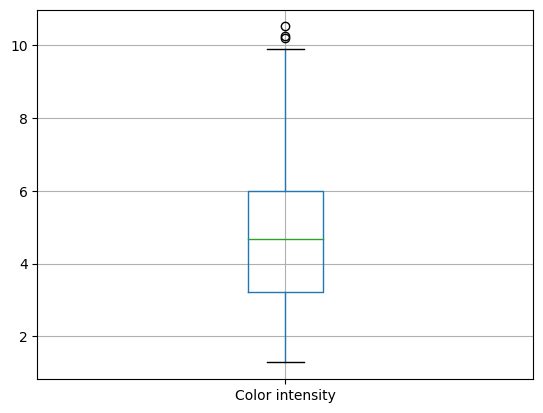

In [26]:
# boxplot = dfClean.boxplot(column='Malic acid')
# boxplot
outlierList = ['Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Proanthocyanins', 'Color intensity', 'Hue']

def delOutlier(col):
    q1 = dfClean[col].quantile(0.25)
    q3 = dfClean[col].quantile(0.75)
    iqr = q3 - q1

    # Filter outliers and replace them with the median
    # dfClean.loc[(dfClean[col] < q1 - 1.5 * iqr) | (dfClean[col] > q3 + 1.5 * iqr), col] = dfClean[col].median()
    dfClean[col] = dfClean[col].mask((dfClean[col] < q1 - 1.5 * iqr) | (dfClean[col] > q3 + 1.5 * iqr), df[col].median())

for col in outlierList:
    delOutlier(col)

# Now you can plot the boxplot after removing outliers
boxplot = dfClean.boxplot(column='Color intensity')
boxplot

**Split the variables**

X includes all columns except `Class label`, Y includes only `Class label`.

In [27]:
### START CODE HERE ###
X = dfClean.drop(columns = 'Class label')
Y = dfClean[['Class label']]
# print(f"X's columns: {X}")
# print(f"Y's columns: {Y}")
### END CODE HERE ###


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
X's columns: ['Alcalinity of ash', 'Alcohol', 'Ash', 'Color intensity', 'Flavanoids', 'Hue', 'Magnesium', 'Malic acid', 'Nonflavanoid phenols', 'OD280/OD315 of diluted wines', 'Proanthocyanins', 'Proline', 'Total phenols']
Y's column: ['Class label']
```

</details>

In [28]:
print("X's columns:",X.columns.tolist())
print("Y's column:",Y.columns.tolist())

X's columns: ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
Y's column: ['Class label']


**Data Transformation**

Standardize X Dataframe.
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- Scikitlearn's `preprocessing` migth be useful here.</br>
https://scikit-learn.org/stable/modules/preprocessing.html
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

</br>

|                  | Alcalinity of ash | Alcohol | Ash             | Color intensity | Flavanoids | Hue              | Magnesium | Malic acid | Nonflavanoid phenols | OD280/OD315 of diluted wines | Proanthocyanins | Proline | Total phenols |
|------------------|-------------------|---------|-----------------|------------------|------------|------------------|-----------|------------|----------------------|-----------------------------|-----------------|---------|---------------|
| count            | 178.0             | 178.0   | 178.0           | 178.0            | 178.0      | 178.0            | 178.0     | 178.0      | 178.0                | 178.0                       | 178.0           | 178.0   | 178.0         |
| mean             | 0.0               | 0.0     | 1.247442e-17    | 9.979533e-18     | 0.0        | 0.0              | 0.0       | 1.197544e-16 | 0.0                  | 0.0                         | 0.0             | 0.0     | 0.0           |
| std              | 1.002821          | 1.002821| 1.002821        | 1.002821         | 1.002821   | 1.002821         | 1.002821  | 1.002821   | 1.002821             | 1.002821                    | 1.002821        | 1.002821| 1.002821      |
| min              | -2.671018         | -2.434235| -3.679162       | -1.634288        | -1.695971  | -2.094732        | -2.088255 | -1.432983  | -1.868234            | -2.069034                   | -1.493188       | -2.107246| -2.671018     |
| 25%              | -0.689137         | -0.788245| -0.5721225      | -0.7951025       | -0.827539  | -0.767562        | -0.824415 | -0.6587486 | -0.7401408           | -0.597284                   | -0.784638       | -0.885468| -0.689137     |
| 50%              | 0.001518          | 0.061   | -0.02382132     | -0.1592246       | 0.10615    | 0.033127         | -0.122282 | -0.423112  | -0.1760947           | -0.0628977                  | -0.233720       | 0.09596 | 0.001518      |
| 75%              | 0.602088          | 0.836129| 0.6981085       | 0.493956         | 0.849085   | 0.713164         | 0.509638  | 0.6697929  | 0.6095407            | 0.629175                    | 0.7582486       | 0.808997| 0.602088      |
| max              | 3.154511          | 2.259772| 3.156325        | 3.435432         | 3.062832   | 3.301694         | 4.371372  | 3.109192   | 2.402403             | 1.960915                    | 3.485073        | 2.971473| 3.154511      |


</details>

In [29]:
### START CODE HERE ###
standardize_scaler = preprocessing.StandardScaler()
X_scaled = standardize_scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns = X.columns)
### END CODE HERE ###
X.describe()


Alcohol    Malic acid           Ash  Alcalinity of ash  \
count  1.780000e+02  1.780000e+02  1.780000e+02       1.780000e+02   
mean  -8.382808e-16  3.991813e-17 -4.366046e-16       1.995907e-16   
std    1.002821e+00  1.002821e+00  1.002821e+00       1.002821e+00   
min   -2.434235e+00 -1.492017e+00 -2.685277e+00      -2.712903e+00   
25%   -7.882448e-01 -6.523012e-01 -6.077230e-01      -7.241731e-01   
50%    6.099988e-02 -3.991694e-01 -9.792801e-03       3.817318e-02   
75%    8.361286e-01  6.912445e-01  7.198847e-01       7.010830e-01   
max    2.259772e+00  2.840431e+00  2.260315e+00       2.524085e+00   

          Magnesium  Total phenols    Flavanoids  Nonflavanoid phenols  \
count  1.780000e+02     178.000000  1.780000e+02          1.780000e+02   
mean  -4.989766e-16       0.000000 -3.991813e-16          3.592632e-16   
std    1.002821e+00       1.002821  1.002821e+00          1.002821e+00   
min   -2.345389e+00      -2.107246 -1.695971e+00         -1.868234e+00   
25%   -8.713549e-01      -0.885468 -8.275393e-01         -7.401412e-01   
50%   -5.244691e-02       0.095960  1.061497e-01         -1.760948e-01   
75%    6.026794e-01       0.808997  8.490851e-01          6.095413e-01   
max    2.895622e+00       2.539515  3.062832e+00          2.402403e+00   

       Proanthocyanins  Color intensity           Hue  \
count     1.780000e+02     1.780000e+02  1.780000e+02   
mean      1.397135e-16    -8.482603e-17  5.588538e-16   
std       1.002821e+00     1.002821e+00  1.002821e+00   
min      -2.164721e+00    -1.736510e+00 -2.143407e+00   
25%      -5.969366e-01    -8.068607e-01 -7.733881e-01   
50%      -3.234761e-02    -1.048319e-01  4.182952e-02   
75%       6.955522e-01     5.253169e-01  7.551450e-01   
max       2.594624e+00     2.691304e+00  2.249711e+00   

       OD280/OD315 of diluted wines       Proline  
count                  1.780000e+02  1.780000e+02  
mean                   3.193450e-16 -1.596725e-16  
std                    1.002821e+00  1.002821e+00  
min                   -1.895054e+00 -1.493188e+00  
25%                   -9.522483e-01 -7.846378e-01  
50%                    2.377348e-01 -2.337204e-01  
75%                    7.885875e-01  7.582494e-01  
max                    1.960915e+00  2.971473e+00

**Visualize Variable (scatter plot pairs of variables)**
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `sns.pairplot()`
</details>
<br>


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

![image.png](attachment:image.png)

</details>

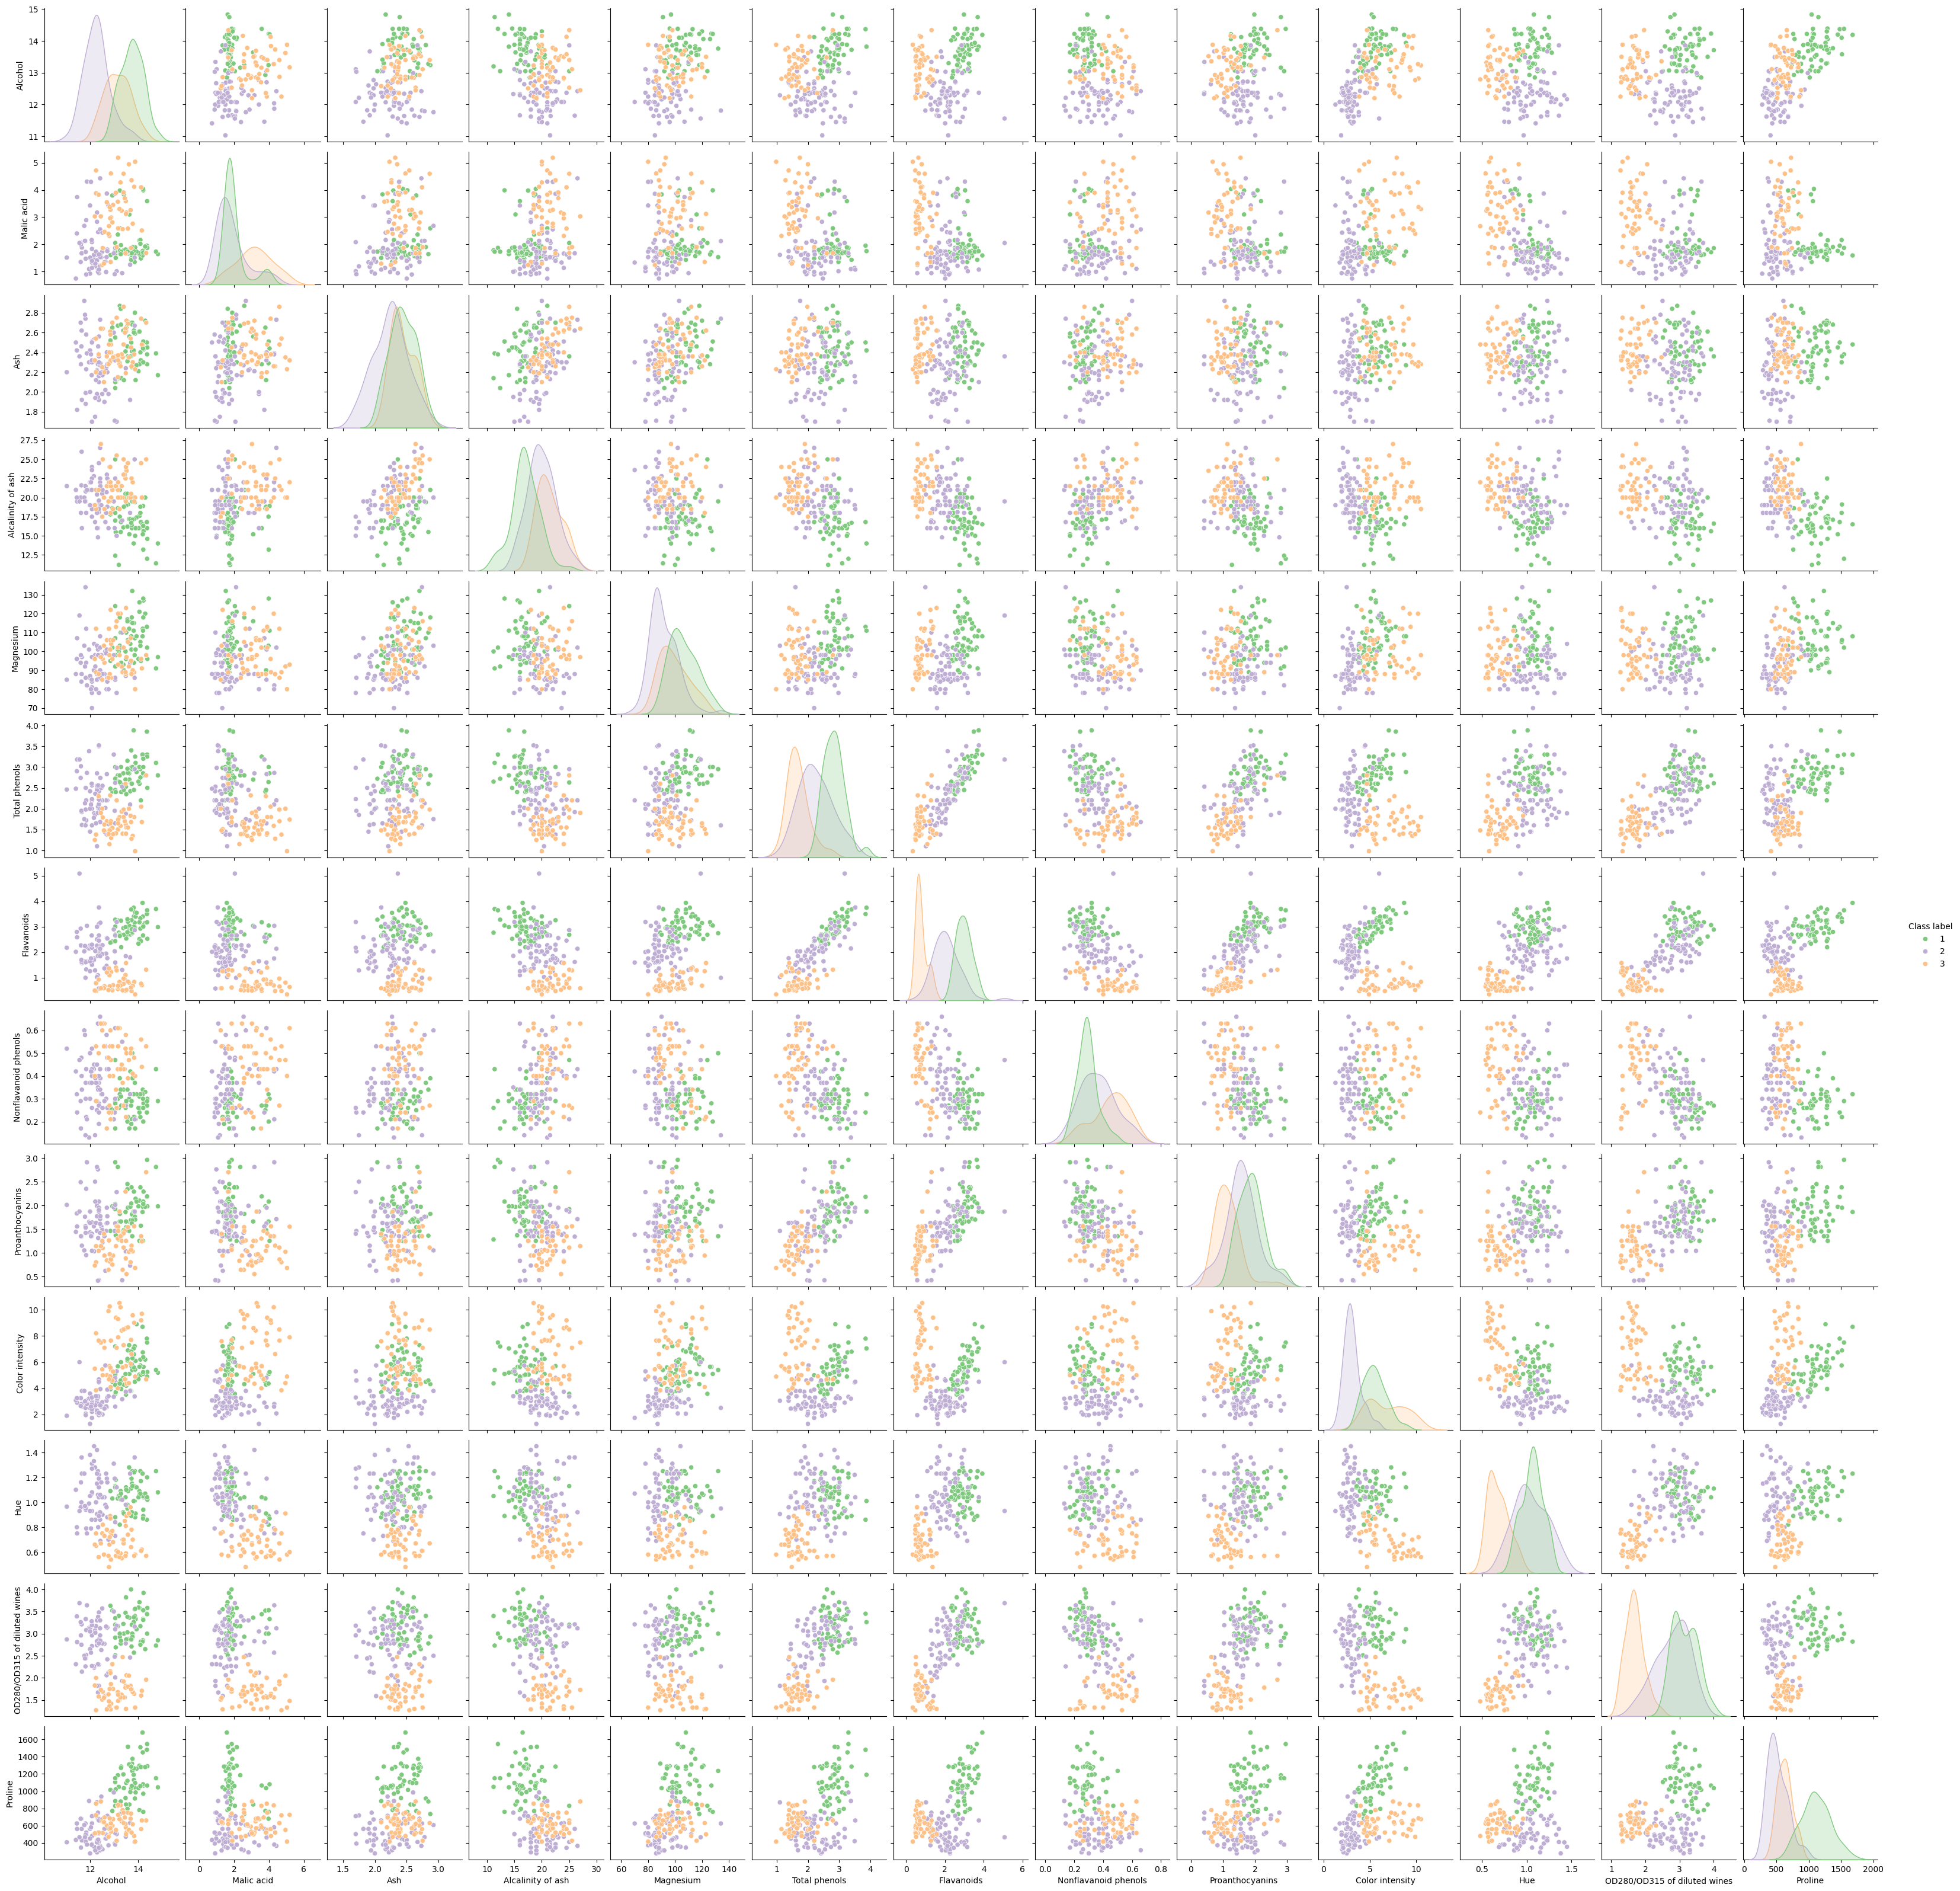

In [30]:
### START CODE HERE ###
# dfCopy = sns.load_dataset(X)
sns.pairplot(dfClean, hue ='Class label', palette='Accent')
### END CODE HERE ###

## Principal Component Analysis (PCA)

**Calculate PCA of all varaiables**

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `PCA()`
- This might be useful : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
Explained Variance ratio: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]
Explained Variance (eigenvalues) : [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]
--------------------------------------------
PCA components (eigenvectors) :
[[-0.23932041  0.1443294  -0.00205106 -0.0886167   0.4229343   0.29671456
   0.14199204 -0.24518758 -0.2985331   0.37616741  0.31342949  0.28675223
   0.39466085]
 [ 0.0105905  -0.48365155 -0.31606881 -0.52999567  0.00335981  0.27923515
  -0.299634   -0.22493093 -0.02877949  0.16449619 -0.03930172 -0.36490283
  -0.06503951]]
```
![image.png](attachment:image.png)


</details>


Explained Variance ratio: [0.37086336 0.20332931 0.0954301  0.0694187  0.06023354 0.04419032
 0.03910542 0.02895931 0.02478652 0.02137276 0.01903084 0.01554002
 0.00773979]
Explained Variance (eigenvalues) : [4.84846221 2.65821482 1.24760029 0.90754165 0.78745996 0.57771981
 0.5112426  0.37859801 0.32404525 0.27941568 0.24879869 0.20316165
 0.1011857 ]
--------------------------------------------
PCA components (eigenvectors) :
[[ 0.15843193 -0.22949146 -0.00900944 -0.28184217  0.12804436  0.39166918
   0.42149646 -0.28918228  0.31811799 -0.05327639  0.29483535  0.36947873
   0.29008829]
 [-0.4605688  -0.24730811 -0.31509024  0.03817107 -0.37576585 -0.03571682
   0.02510589 -0.03199428  0.00391039 -0.51258578  0.25254414  0.17726316
  -0.35197492]
 [-0.15281202  0.04325352  0.68696786  0.55094626  0.1771668   0.15251558
   0.11028367  0.14399895  0.10486423 -0.24140296  0.10878308  0.1509669
  -0.08869653]
 [-0.05291463  0.56164356 -0.17780202  0.14569654 -0.19119538  0.17761175
   0.1

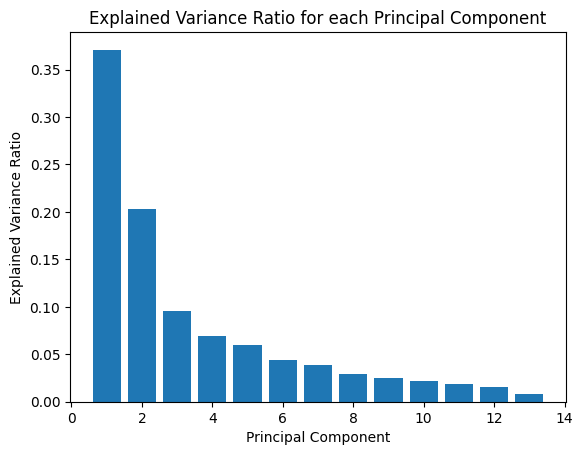

In [31]:
### START CODE HERE ###
pca = PCA(n_components=13)
X_pca = pca.fit_transform(X)
print('Explained Variance ratio:',pca.explained_variance_ratio_)
print('Explained Variance (eigenvalues) :',  pca.explained_variance_)
print('--------------------------------------------')
print('PCA components (eigenvectors) :')
print(pca.components_)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for each Principal Component')
plt.show()
### END CODE HERE ###

**Calculate PCA of 3 varaiables**

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `PCA()`
- This might be useful : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
Explained Variance ratio: [0.36198848 0.1920749 ]
Explained Variance (eigenvalues) : [4.73243698 2.51108093]
--------------------------------------------
PCA components (eigenvectors) :
[[-0.23932041  0.1443294  -0.00205106 -0.0886167   0.4229343   0.29671456
   0.14199204 -0.24518758 -0.2985331   0.37616741  0.31342949  0.28675223
   0.39466085]
 [ 0.0105905  -0.48365155 -0.31606881 -0.52999567  0.00335981  0.27923515
  -0.299634   -0.22493093 -0.02877949  0.16449619 -0.03930172 -0.36490283
  -0.06503951]]
```
![SegmentLocal](PCA_3_components.png "segment")

</details>


Explained Variance ratio: [0.37086336 0.20332931 0.0954301 ]
Explained Variance (eigenvalues) : [4.84846221 2.65821482 1.24760029]
--------------------------------------------
PCA components (eigenvectors) :
[[ 0.15843193 -0.22949146 -0.00900944 -0.28184217  0.12804436  0.39166918
   0.42149646 -0.28918228  0.31811799 -0.05327639  0.29483535  0.36947873
   0.29008829]
 [-0.4605688  -0.24730811 -0.31509024  0.03817107 -0.37576585 -0.03571682
   0.02510589 -0.03199428  0.00391039 -0.51258578  0.25254414  0.17726316
  -0.35197492]
 [-0.15281202  0.04325352  0.68696786  0.55094626  0.1771668   0.15251558
   0.11028367  0.14399895  0.10486423 -0.24140296  0.10878308  0.1509669
  -0.08869653]]


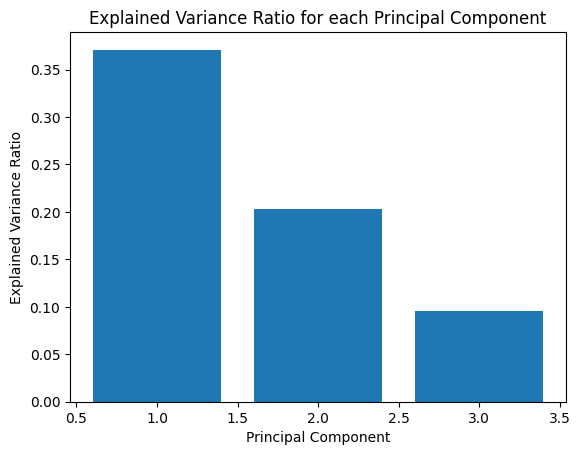

In [32]:
### START CODE HERE ###
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
print('Explained Variance ratio:',pca.explained_variance_ratio_)
print('Explained Variance (eigenvalues) :',  pca.explained_variance_)
print('--------------------------------------------')
print('PCA components (eigenvectors) :')
print(pca.components_)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for each Principal Component')
plt.show()
### END CODE HERE ###

### **Train/Test Model**

**Train/Test Split**

Split the dataset into training and testing sets. Reserve frist 80% of data for training and last 20% for testing.

In [33]:
### START CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
print(f'{len(X_train)},{len(X_test)}')
### END CODE HERE ###

142,36


Split training data into training (70%) and validation sets (30%).

In [34]:
### START CODE HERE ###
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state = 42)
print(f'{len(X_train)},{len(X_valid)}')
### END CODE HERE ###

99,43


**Initialize models**
- `LinearRegression()`

In [35]:
### START CODE HERE ###
model = LinearRegression(copy_X = True)
model_pca = []
for i in range(len(X.columns)):
  model_pca.append(LinearRegression(copy_X = True))
len(model_pca)
### END CODE HERE ###

13

### Model Training

Train LinearRegerssion() using
1. X original data

In [36]:
### START CODE HERE ###
model.fit(X_train,y_train) # เทรน Model
model.score(X_train,y_train)
### END CODE HERE ###

0.8949985172382835

2. X_PCA with n_components = n
- (Choose n at least 3 values from n_list = range(1,N)
- N = จำนวน input Feature (dimension of X)

In [37]:
### START CODE HERE ###
for i in range(len(X.columns)):
  pca = PCA(n_components= i+1)
  X_pca = pca.fit_transform(X_train)

  model_pca[i].fit(X_pca,y_train) # เทรน Model
  print(f"PCA n_component = {i+1} : score = {model_pca[i].score(X_pca,y_train)}")
### END CODE HERE ###

PCA n_component = 1 : score = 0.8004531945362235
PCA n_component = 2 : score = 0.8020729119131842
PCA n_component = 3 : score = 0.8172943793303343
PCA n_component = 4 : score = 0.8185624451211584
PCA n_component = 5 : score = 0.8299033007876809
PCA n_component = 6 : score = 0.8332822054242064
PCA n_component = 7 : score = 0.8609196739197685
PCA n_component = 8 : score = 0.8633315410663401
PCA n_component = 9 : score = 0.8641417076587609
PCA n_component = 10 : score = 0.8690786843342304
PCA n_component = 11 : score = 0.8864730158735586
PCA n_component = 12 : score = 0.8866117487854948
PCA n_component = 13 : score = 0.8949985172382835


**Model Performance Evaluation (MSE, R-square)**


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- mean_squared_error(), r2_score()

- Scikitlearn's `metrics` migth be useful here.</br>
https://scikit-learn.org/stable/modules/model_evaluation.html

</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

</br>

| | n  | val_MSE  | test_MSE |  val_r2  | test_r2  |
|-|----|----------|----------|----------|----------|
|0| 0  | 0.051039 | 0.111825 | 0.914363 | 0.823047 |
|1| 1  | 0.106382 | 0.153570 | 0.821506 | 0.756988 |
|2| 2  | 0.106146 | 0.155484 | 0.821902 | 0.753960 |
|3| 3  | 0.113444 | 0.171154 | 0.809658 | 0.729162 |
|4| 4  | 0.113062 | 0.175151 | 0.810297 | 0.722838 |
|5| 5  | 0.096968 | 0.146228 | 0.837302 | 0.768607 |
|6| 7  | 0.072978 | 0.119330 | 0.877554 | 0.811170 |
|7| 10 | 0.057971 | 0.107307 | 0.902733 | 0.830195 |
|8| 13 | 0.051039 | 0.111825 | 0.914363 | 0.823047 |


</details>

1. Model Evaluation with Validation and Test Data

In [38]:
### START CODE HERE ###
# def compute_accuracy(Y_true, Y_pred):
#     correctly_predicted = 0
#     # iterating over every label and checking it with the true sample
#     for true_label, predicted in zip(Y_true, Y_pred):
#         if true_label == predicted:
#             correctly_predicted += 1
#     # computing the accuracy score
#     accuracy_score = correctly_predicted / len(Y_true)
#     return accuracy_score
y_valid_pred = model.predict(X_valid)
accuracy_valid = accuracy_score(y_valid.values.ravel().tolist(),np.round(y_valid_pred).ravel().tolist())
print("Accuracy valid (no PCA):", accuracy_valid)

y_test_pred = model.predict(X_test)
accuracy_test = accuracy_score(y_test.values.ravel().tolist(), np.round(y_test_pred).ravel().tolist())
print("Accuracy test (no PCA):", accuracy_test)

#pca model
y_valid_pred_pca = []
y_test_pred_pca = []
for i in range(len(X.columns)):

  pca = PCA(n_components= i+1)
  X_valid_pca = pca.fit_transform(X_valid)
  X_test_pca = pca.fit_transform(X_test)

  y_valid_pred_pca.append(model_pca[i].predict(X_valid_pca))
  accuracy_valid = accuracy_score(y_valid.values.ravel().tolist(),np.round(y_valid_pred_pca[i]).ravel().tolist())
  print(f"Accuracy valid (with PCA n_component = {i+1}):", accuracy_valid)

  y_test_pred_pca.append(model_pca[i].predict(X_test_pca))
  accuracy_test = accuracy_score(y_test.values.ravel().tolist(), np.round(y_test_pred_pca[i]).ravel().tolist())
  print(f"Accuracy test (with PCA n_component = {i+1}):", accuracy_test)
# X_pca = pca.fit_transform(X_valid)
# y_valid_pred_pca = model_pca[i].predict(X_pca)
# accuracy_valid = accuracy_score(y_valid.values.ravel().tolist(),np.round(y_valid_pred_pca).ravel().tolist())
# print("Accuracy valid (with PCA):", accuracy_valid)


# X_pca = pca.fit_transform(X_test)
# y_test_pred_pca = model_pca[i].predict(X_pca)
# accuracy_test = accuracy_score(y_test.values.ravel().tolist(), np.round(y_test_pred_pca).ravel().tolist())
# print("Accuracy test (with PCA):", accuracy_test)
### END CODE HERE ###

Accuracy valid (no PCA): 0.9069767441860465
Accuracy test (no PCA): 0.9444444444444444
Accuracy valid (with PCA n_component = 1): 0.7906976744186046
Accuracy test (with PCA n_component = 1): 0.7777777777777778
Accuracy valid (with PCA n_component = 2): 0.813953488372093
Accuracy test (with PCA n_component = 2): 0.8333333333333334
Accuracy valid (with PCA n_component = 3): 0.813953488372093
Accuracy test (with PCA n_component = 3): 0.8055555555555556
Accuracy valid (with PCA n_component = 4): 0.813953488372093
Accuracy test (with PCA n_component = 4): 0.8333333333333334
Accuracy valid (with PCA n_component = 5): 0.8372093023255814
Accuracy test (with PCA n_component = 5): 0.8055555555555556
Accuracy valid (with PCA n_component = 6): 0.8372093023255814
Accuracy test (with PCA n_component = 6): 0.75
Accuracy valid (with PCA n_component = 7): 0.7906976744186046
Accuracy test (with PCA n_component = 7): 0.75
Accuracy valid (with PCA n_component = 8): 0.7906976744186046
Accuracy test (with P

2. Calculate Model Performance Metrics (MSE, R-square) of Validation and Test Data

In [39]:
### START CODE HERE ###
print('mean_squared_error validation (no pca) :',mean_squared_error(y_valid,y_valid_pred))
print('mean_squared_error Test Data (no pca) :',mean_squared_error(y_test,y_test_pred))

print('r2_score validation Data (no pca) :',r2_score(y_valid,y_valid_pred))
print('r2_score Test Data (no pca) :',r2_score(y_test,y_test_pred))

for i in range(len(X.columns)):
  print(f'mean_squared_error validation (with pca n_component = {i+1}) :',mean_squared_error(y_valid,y_valid_pred_pca[i]))
  print(f'mean_squared_error Test Data (with pca n_component = {i+1}) :',mean_squared_error(y_test,y_test_pred_pca[i]))

  print(f'r2_score validation Data (with pca n_component = {i+1}) :',r2_score(y_valid,y_valid_pred_pca[i]))
  print(f'r2_score Test Data (with pca n_component = {i+1}) :',r2_score(y_test,y_test_pred_pca[i]))
  print()
### END CODE HERE ###

mean_squared_error validation (no pca) : 0.09048149475049577
mean_squared_error Test Data (no pca) : 0.06753199526868242
r2_score validation Data (no pca) : 0.8498202120344105
r2_score Test Data (no pca) : 0.8842308652536872
mean_squared_error validation (with pca n_component = 1) : 0.13584701867058444
mean_squared_error Test Data (with pca n_component = 1) : 0.15516759545915454
r2_score validation Data (with pca n_component = 1) : 0.7745232158690211
r2_score Test Data (with pca n_component = 1) : 0.7339984077843065

mean_squared_error validation (with pca n_component = 2) : 0.1375269875310686
mean_squared_error Test Data (with pca n_component = 2) : 0.14426987827843796
r2_score validation Data (with pca n_component = 2) : 0.7717348294928673
r2_score Test Data (with pca n_component = 2) : 0.7526802086655349

mean_squared_error validation (with pca n_component = 3) : 0.14468912966701827
mean_squared_error Test Data (with pca n_component = 3) : 0.14171742031346382
r2_score validation Dat

## Bar Graph for MSE, R-Square Comparison
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

![image.png](attachment:image.png)

</br>

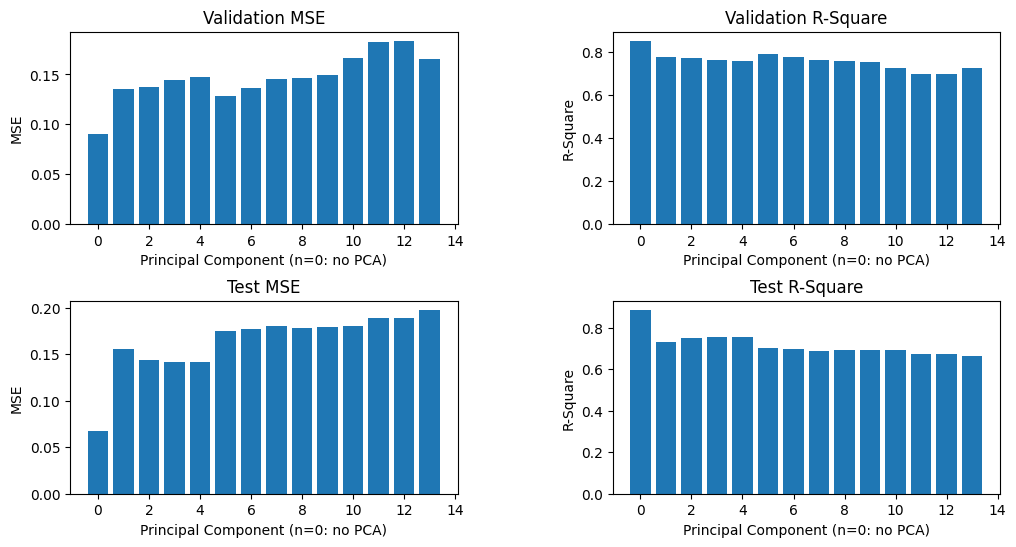

In [43]:
### START CODE HERE ###
plt.figure(figsize = (12, 6))
plt.subplot(2,2,1), plt.bar(np.arange(14),[mean_squared_error(y_valid,y_valid_pred)] + [mean_squared_error(y_valid, y_valid_pred_pca[i]) for i in range(len(X.columns))])
plt.title('Validation MSE')
plt.ylabel('MSE')
plt.xlabel('Principal Component (n=0: no PCA)')

plt.subplot(2,2,2), plt.bar(np.arange(14),[r2_score(y_valid,y_valid_pred)] + [r2_score(y_valid,y_valid_pred_pca[i]) for i in range(len(X.columns))])
plt.title('Validation R-Square')
plt.ylabel('R-Square')
plt.xlabel('Principal Component (n=0: no PCA)')

plt.subplot(2,2,3), plt.bar(np.arange(14),[mean_squared_error(y_test,y_test_pred)] + [mean_squared_error(y_test,y_test_pred_pca[i]) for i in range(len(X.columns))])
plt.title('Test MSE')
plt.ylabel('MSE')
plt.xlabel('Principal Component (n=0: no PCA)')

plt.subplot(2,2,4), plt.bar(np.arange(14),[r2_score(y_test,y_test_pred)] + [r2_score(y_test,y_test_pred_pca[i]) for i in range(len(X.columns))])
plt.title('Test R-Square')
plt.ylabel('R-Square')
plt.xlabel('Principal Component (n=0: no PCA)')

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()
### END CODE HERE ###

## Question
1. What is the optimal value of n that
- ensures the Mean Squared Error (MSE) difference by no more than 0.01 from the MSE of the original data?

2. When taking into account R-square, what optimum value of n
- results in an R-square difference not exceeding 0.1 from the R-square of the original data?

3. Determine the dimension reduction ratio (m / N), where:
- m is the minimum of the optimum values of n obtained from questions 2 and 3.
- N represents the number of input features (dimension of X).

In [21]:
# Ans
#1 n = 4 %eigenvalue top 4 Have min MSE
#2 n = 4 %eigenvalue top 4 Have max R_score
#3 4/13 = 0.3076923076923077